In [27]:
import nltk
import numpy as np
import math
from collections import Counter
from collections import defaultdict
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import classification_report

In [28]:
nltk.download('brown')
nltk.download('universal_tagset')

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\AMEEYA\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\AMEEYA\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


True

In [29]:
start_token = '^'
end_token = '$'
tagged_sentences = nltk.corpus.brown.tagged_sents(tagset='universal')

In [30]:
result=[]
for i in range(len(tagged_sentences)):
    temp=[]
    sentence = tagged_sentences[i]
    temp.append((start_token,start_token))
    for word,tag in sentence:
        temp.append((word.lower(),tag))
    temp.append((end_token,end_token))
    result.append(temp)

tagged_sentences = result

In [31]:
def Training(sentences):
    list_of_all_tuples = []
    for sentence in sentences:
        for word,tag in sentence:
            list_of_all_tuples.append((word,tag))
    POS_tag_counts = Counter(tag for word,tag in list_of_all_tuples)
    word_pos_tags = defaultdict(Counter)
    for word,pos_tag in list_of_all_tuples:
        word_pos_tags[word][pos_tag]+=1
    Tag_transition_count = defaultdict(Counter)
    for sentence in sentences:
        for i in range(len(sentence)-1):
            Tag_transition_count[sentence[i][1]][sentence[i+1][1]]+=1

    return POS_tag_counts,word_pos_tags,Tag_transition_count

In [32]:
#probability of tag2 given tag1
def transition_probability(tag1,tag2,POS_tag_counts,Tag_transition_count):
    tag1_tag2 = Tag_transition_count[tag1][tag2]
    tag1_total = POS_tag_counts[tag1]
    res = (tag1_tag2) / (tag1_total) 
    if(res==0):
        res = 10**-9
    return res

In [38]:
# Laplace smoothing
def lexical_probability(word,tag,POS_tag_counts,word_pos_tags):
    word_tag = word_pos_tags[word][tag]
    tag_total = POS_tag_counts[tag]
    res = (word_tag+1)/(tag_total+len(word_pos_tags))
    return res

In [36]:
def Viterbi_Algorithm(untagged_sentence,POS_tag_counts,word_pos_tags,Tag_transition_count):
    n = len(untagged_sentence)
    prev = defaultdict(Counter)
    curr = defaultdict(Counter)
    parent = defaultdict(Counter)
    for tag in POS_tag_counts:
        prev[tag] = 0.0
    prev[start_token]=0.0
    parent[0][start_token] = 0

    for i in range(1,n-1):
        word = untagged_sentence[i]
        for tag in POS_tag_counts:
            curr[tag] = 1.0
            for prev_tag in POS_tag_counts:
                temp = prev[prev_tag] + math.log(lexical_probability(word,tag,POS_tag_counts,word_pos_tags)) + math.log(transition_probability(prev_tag,tag,POS_tag_counts,Tag_transition_count))
                if curr[tag]==1.0 or temp>curr[tag]:
                    curr[tag] = temp
                    parent[i][tag] = prev_tag
        for tag in POS_tag_counts:
            prev[tag] = curr[tag]

    final_tags = ['$' for i in range(n)]
    for tag in POS_tag_counts:
        if curr[tag] > curr[final_tags[n-2]]:
            final_tags[n-2] = tag
    for i in range(n-3,0,-1):
        final_tags[i] = parent[i+1][final_tags[i+1]]
    final_tags[0] = start_token
    return final_tags


In [39]:
Last_POS_tag_counts,Last_word_pos_tags,Last_Tag_transition_count = defaultdict(Counter), defaultdict(Counter), defaultdict(Counter)
kfold = KFold(n_splits=5, shuffle=True, random_state=1)
tagged_sentences = np.array(tagged_sentences,dtype='object')
y_pred_list = []
y_true_list = []
for fold, (train, test) in enumerate(kfold.split(tagged_sentences)):
    train_sentences = tagged_sentences[train]
    test_sentences = tagged_sentences[test]
    POS_tag_counts,word_pos_tags,Tag_transition_count = Training(train_sentences)
    if(fold==3):
        Last_POS_tag_counts = POS_tag_counts
        Last_word_pos_tags = word_pos_tags
        Last_Tag_transition_count = Tag_transition_count
    y_pred = []
    y_true = []

    for sentence in test_sentences:
        untagged_sentence = [word for word,tag in sentence]
        prediction = Viterbi_Algorithm(untagged_sentence,POS_tag_counts,word_pos_tags,Tag_transition_count)
        for i in range(1,len(prediction)-1):
            y_pred.append(prediction[i])
            y_true.append(sentence[i][1])

    y_pred_list.append(np.array(y_pred))
    y_true_list.append(np.array(y_true))
    accuracy = accuracy_score(y_true_list[-1],y_pred_list[-1],normalize=True)
    print(f'Accuracy for Fold {fold + 1} : {accuracy}')


^ PRON
^ PRON
^ PRON
^ PRON
^ PRON
^ PRON
^ PRON
^ PRON
^ PRON
^ PRON
^ PRON
^ PRON
^ PRON
^ PRON
DET PRON
DET PRON
DET PRON
DET PRON
DET PRON
DET PRON
DET PRON
DET PRON
DET PRON
DET PRON
DET PRON
DET PRON
DET PRON
DET PRON
NOUN PRON
NOUN PRON
NOUN PRON
NOUN PRON
NOUN PRON
NOUN PRON
NOUN PRON
NOUN PRON
NOUN PRON
NOUN PRON
NOUN PRON
NOUN PRON
NOUN PRON
NOUN PRON
ADJ PRON
ADJ PRON
ADJ PRON
ADJ PRON
ADJ PRON
ADJ PRON
ADJ PRON
ADJ PRON
ADJ PRON
ADJ PRON
ADJ PRON
ADJ PRON
ADJ PRON
ADJ PRON
VERB PRON
VERB PRON
VERB PRON
VERB PRON
VERB PRON
VERB PRON
VERB PRON
VERB PRON
VERB PRON
VERB PRON
VERB PRON
VERB PRON
VERB PRON
VERB PRON
ADP PRON
ADP PRON
ADP PRON
ADP PRON
ADP PRON
ADP PRON
ADP PRON
ADP PRON
ADP PRON
ADP PRON
ADP PRON
ADP PRON
ADP PRON
ADP PRON
. PRON
. PRON
. PRON
. PRON
. PRON
. PRON
. PRON
. PRON
. PRON
. PRON
. PRON
. PRON
. PRON
. PRON
$ PRON
$ PRON
$ PRON
$ PRON
$ PRON
$ PRON
$ PRON
$ PRON
$ PRON
$ PRON
$ PRON
$ PRON
$ PRON
$ PRON
ADV PRON
ADV PRON
ADV PRON
ADV PRON
ADV PRON
ADV

KeyboardInterrupt: 

In [ ]:
f0_5_score=0
f1score=0
f2score=0
precision = 0
recall = 0
for i in range(5):
    f0_5_score+=fbeta_score(y_true_list[i],y_pred_list[i],beta=0.5,average='weighted',zero_division=0)
    f1score+=fbeta_score(y_true_list[i],y_pred_list[i],beta=1,average='weighted',zero_division=0)
    f2score+=fbeta_score(y_true_list[i],y_pred_list[i],beta=2,average='weighted',zero_division=0)
    precision+=precision_score(y_true_list[i],y_pred_list[i],average='weighted',zero_division=0)
    recall+=recall_score(y_true_list[i],y_pred_list[i],average='weighted',zero_division=0)
f0_5_score = f0_5_score/5.0
f1score = f1score/5.0
f2score = f2score/5.0
precision = precision/5.0
recall = recall/5.0

print(f'Precision : {precision}')
print(f'Recall : {recall}')
print(f'F0.5 Score : {f0_5_score}')
print(f'F1 Score : {f1score}')
print(f'F2 Score : {f2score}')

Precision : 0.940198283308899
Recall : 0.9385240363559173
F0.5 Score : 0.9394349573883816
F1 Score : 0.9386931499010809
F2 Score : 0.938428994887414


In [ ]:
def classification_report_function(y_true_list,y_pred_list):
    tagset = ['.', 'ADJ', 'ADP', 'ADV', 'CONJ', 'DET', 'NOUN', 'NUM', 'PRON', 'PRT', 'VERB', 'X']
    report = 0
    support = 0
    check = 0
    for i in range(5):
        cr = classification_report(y_true_list[i],y_pred_list[i],labels=tagset,zero_division=0)
        cr = cr.replace('macro avg', 'macro')
        cr = cr.replace('micro avg', 'micro')
        cr = cr.replace('weighted avg', 'weighted')
        cr = cr.replace('\n\n', '\n')
        lines = cr.split('\n')
        classes , mat , sup = [], [], []
        for line in lines[1:]:
            a = line.strip().split()
            if len(a) < 2:
                continue
            temp = [float(x) for x in a[1: len(a) - 1]]
            sup.append(int(a[-1]))
            classes.append(a[0])
            mat.append(temp)
        mat = np.array(mat)
        sup = np.array(sup)
        if(i==0):
            report = mat
            support = sup
        else:
            report+=mat
            support+=sup
    report = report/5.0
    support = support/5.0
    xticklabels = ['Precision', 'Recall', 'F1-Score']
    yticklabels = ['{0}[{1}]'.format(classes[i], sup_i) for i, sup_i in enumerate(support)]
    plt.clf()
    fig, ax = plt.subplots(figsize=(18,10))
    ax.xaxis.set_ticks_position('top')
    ax.xaxis.set_tick_params(labelsize=15)
    ax.yaxis.set_tick_params(labelsize=15)
    plt.imshow(report, aspect='auto')
    plt.colorbar()
    plt.xticks(np.arange(3), xticklabels)
    plt.yticks(np.arange(len(classes)), yticklabels)
    for i in range(report.shape[0]):
        for j in range(report.shape[1]):
            plt.text(j, i, format(report[i, j], '.2f'), horizontalalignment="center", verticalalignment="center" ,fontsize=14)
    plt.savefig('classification_report.png')


In [ ]:
def confusion_matrix_function(y_true_list,y_pred_list):
    list_of_tags = ['.', 'ADJ', 'ADP', 'ADV', 'CONJ', 'DET', 'NOUN', 'NUM', 'PRON', 'PRT', 'VERB', 'X']
    count = 0
    mat = 0
    for y_true,y_pred in zip(y_true_list,y_pred_list):
        cm = confusion_matrix(y_true,y_pred,labels=list_of_tags)
        count += 1
        if(count==1):
            mat = cm
        else:
            mat += cm

    mat = mat.astype('float')
    mat = mat/count
    mat_confusion_matrix = mat/np.sum(mat, axis=1, keepdims=True) #With Normalization
    #mat_confusion_matrix = mat  #Without Normalization
    plt.clf()
    fig, ax = plt.subplots(figsize=(12,10))
    tick_marks = np.arange(len(list_of_tags))
    plt.xticks(tick_marks, list_of_tags)
    plt.yticks(tick_marks, list_of_tags)
    for i in range(mat_confusion_matrix.shape[0]):
            for j in range(mat_confusion_matrix.shape[1]):
                plt.text(j, i, format(mat_confusion_matrix[i, j], '0.2f'), horizontalalignment="center")
    plt.imshow(mat_confusion_matrix,interpolation='nearest',cmap=plt.cm.cool)
    plt.colorbar()
    plt.savefig('confusion_matrix.png')

<Figure size 432x288 with 0 Axes>

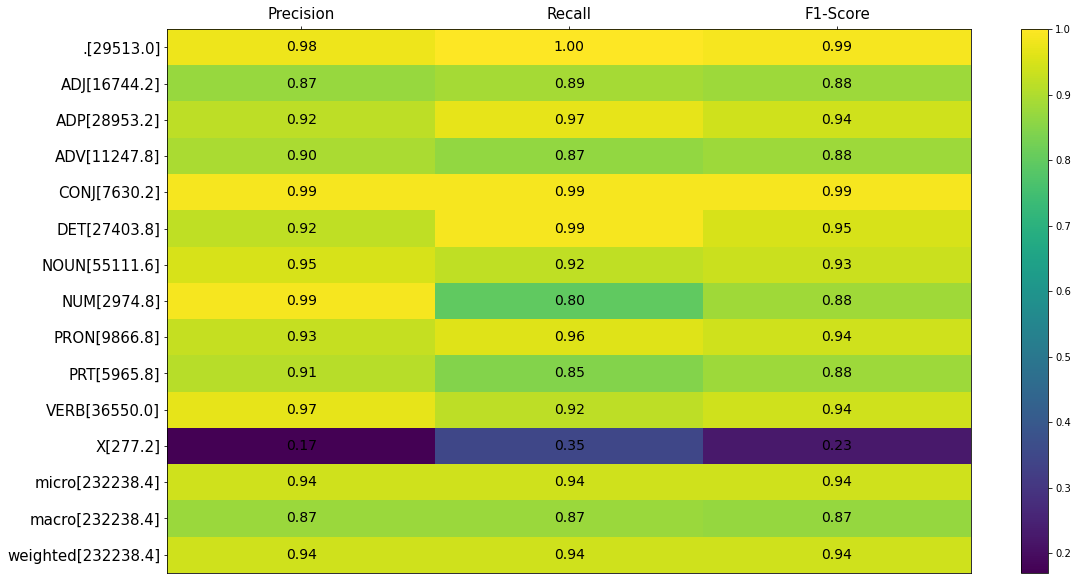

In [ ]:
classification_report_function(y_true_list,y_pred_list)

<Figure size 432x288 with 0 Axes>

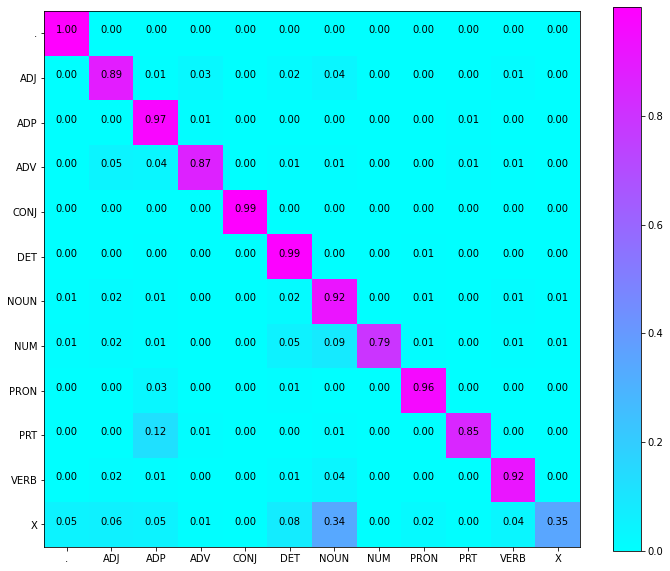

In [ ]:
confusion_matrix_function(y_true_list,y_pred_list)

In [ ]:
def sentence_checking(untagged_sentence,Last_POS_tag_counts,Last_word_pos_tags,Last_Tag_transition_count):
    untagged_sentence = untagged_sentence.lower()
    sentence_list = untagged_sentence.split()
    sentence_list = ['^'] + sentence_list + ['$']
    print(Viterbi_Algorithm(sentence_list,Last_POS_tag_counts,Last_word_pos_tags,Last_Tag_transition_count))

In [ ]:
for_checking = 'I play Football'
sentence_checking(for_checking,Last_POS_tag_counts,Last_word_pos_tags,Last_Tag_transition_count)

['^', 'PRON', 'VERB', 'NOUN', '$']
